In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Feature_ENGG/WBI_country_level_features.csv')
hf = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Final datasets/USAID/combined_usaid_country.csv')

In [3]:
df.head()

,Unnamed: 0,Country Name,Gni Growth (Annual %)_MA(3)_2005-2007,Gni Growth (Annual %)_MA(3)_2008-2010,Gni Growth (Annual %)_MA(3)_2011-2013,Gni Growth (Annual %)_MA(3)_2014-2016,Gni Growth (Annual %)_MA(3)_2017-2019,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2005-2007,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2008-2010,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2011-2013,...,Domestic Private Health Expenditure (% Of Current Health Expenditure)_mean,Agg_Index_min,Agg_Index_max,Agg_Index_median,Agg_Index_q25,Agg_Index_q75,Agg_Index_mean,IncomeGroup,region_USAID,region_WorldBank
0,0,Afghanistan,5.677116,5.436955,4.600461,4.601936,4.615721,4.558018,-2.095752,-2.807691,...,75.752132,-81.476355,-7.850847,-66.640638,-69.710713,-47.119009,-58.145765,Low income,South and Central Asia (SCA),South Asia
1,1,Albania,5.099140,3.008076,2.571634,2.401651,2.381469,1.712014,1.552464,0.704548,...,47.068026,-59.981628,-20.771572,-46.210480,-53.807621,-35.592073,-44.439404,Upper middle income,Europe and Eurasia (E&E),Europe & Central Asia
2,2,Angola,12.899514,6.922703,6.444761,2.218368,-0.496080,-39.948226,7.727869,-4.892475,...,40.764783,-33.562001,73.568802,39.523829,14.102556,57.019539,31.671816,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa
3,3,Armenia,14.098644,-1.788671,5.456736,1.093687,6.580531,-2.286083,-0.402710,1.497731,...,74.995619,-42.314057,35.810650,-17.727030,-27.679988,-10.082781,-13.488843,Upper middle income,Europe and Eurasia (E&E),Europe & Central Asia
4,4,Azerbaijan,24.210910,13.323024,2.243221,4.958547,4.709523,1.755714,-0.855201,-10.997718,...,80.754805,-107.036026,-33.437941,-58.744131,-62.924148,-51.792099,-61.175123,Upper middle income,Europe and Eurasia (E&E),Europe & Central Asia


In [4]:
hf.head()

,country,duration_mean,topic0_mean,topic1_mean,topic2_mean,topic3_mean,topic4_mean,dominant_topic_4_count,dominant_topic_3_count,dominant_topic_2_count,...,awd_amount_median_low,awd_amount_median,awd_amount_median_high,awd_amount_high,awd_amount_very_high,corruption_initial,stability_initial,numberofprojects,change_stability,change_corruption
0,Afghanistan,3.071429,0.036429,0.037857,0.066071,0.176429,0.679643,23,4,1,...,3,1,7,7,5,High Corruption,Unstable,28,Worse,Worse
1,Albania,3.750000,0.037500,0.078750,0.053750,0.308750,0.523750,5,3,0,...,6,2,0,0,0,High Corruption,Unstable,8,Same,Same
2,Angola,5.000000,0.030000,0.030000,0.030000,0.030000,0.870000,1,0,0,...,0,1,0,0,0,High Corruption,Unstable,1,Same,Same
3,Armenia,4.250000,0.035000,0.035000,0.035000,0.035000,0.862500,4,0,0,...,1,1,0,0,0,High Corruption,Unstable,4,Same,Same
4,Azerbaijan,2.800000,0.032000,0.032000,0.032000,0.150000,0.752000,4,1,0,...,1,1,0,0,0,High Corruption,Unstable,5,Same,Same


In [5]:
df = df.merge(hf,left_on='Country Name',right_on='country',how='left')

In [6]:
col = df.columns.to_list()

In [7]:
features = df.drop(['Unnamed: 0','country'],axis = 1)

In [8]:
features[features.isnull().any(axis=1)]['Country Name']

35       Laos
38      Libya
57    Russian
59    SENEGAL
Name: Country Name, dtype: object

In [9]:
features.dropna(inplace=True)

In [10]:
features

,Country Name,Gni Growth (Annual %)_MA(3)_2005-2007,Gni Growth (Annual %)_MA(3)_2008-2010,Gni Growth (Annual %)_MA(3)_2011-2013,Gni Growth (Annual %)_MA(3)_2014-2016,Gni Growth (Annual %)_MA(3)_2017-2019,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2005-2007,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2008-2010,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2011-2013,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2014-2016,...,awd_amount_median_low,awd_amount_median,awd_amount_median_high,awd_amount_high,awd_amount_very_high,corruption_initial,stability_initial,numberofprojects,change_stability,change_corruption
0,Afghanistan,5.677116,5.436955,4.600461,4.601936,4.615721,4.558018,-2.095752,-2.807691,0.940649,...,3.0,1.0,7.0,7.0,5.0,High Corruption,Unstable,28.0,Worse,Worse
1,Albania,5.099140,3.008076,2.571634,2.401651,2.381469,1.712014,1.552464,0.704548,-0.205999,...,6.0,2.0,0.0,0.0,0.0,High Corruption,Unstable,8.0,Same,Same
2,Angola,12.899514,6.922703,6.444761,2.218368,-0.496080,-39.948226,7.727869,-4.892475,11.930747,...,0.0,1.0,0.0,0.0,0.0,High Corruption,Unstable,1.0,Same,Same
3,Armenia,14.098644,-1.788671,5.456736,1.093687,6.580531,-2.286083,-0.402710,1.497731,4.589541,...,1.0,1.0,0.0,0.0,0.0,High Corruption,Unstable,4.0,Same,Same
4,Azerbaijan,24.210910,13.323024,2.243221,4.958547,4.709523,1.755714,-0.855201,-10.997718,-3.662210,...,1.0,1.0,0.0,0.0,0.0,High Corruption,Unstable,5.0,Same,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Ukraine,6.169632,-3.127768,1.784881,-3.668256,3.597352,-5.136590,8.232967,6.120554,14.464869,...,3.0,2.0,0.0,0.0,0.0,High Corruption,Unstable,8.0,Same,Same
67,Vietnam,4.191391,5.738994,5.409869,6.306509,5.608515,0.932053,3.956702,2.176640,2.258835,...,0.0,2.0,0.0,0.0,0.0,High Corruption,Unstable,2.0,Same,Same
68,West Bank and Gaza,5.919415,6.628915,7.818120,4.167535,2.922891,0.369228,1.508832,2.694864,0.638049,...,1.0,4.0,2.0,2.0,0.0,High Corruption,Very Unstable,10.0,Same,Same
69,Yemen,5.123343,5.123343,5.123343,5.123343,5.123343,1.438380,13.547956,14.834163,9.952687,...,0.0,1.0,1.0,0.0,0.0,High Corruption,Very Unstable,3.0,Same,Same


In [11]:
labelList = features['Country Name'].to_list()
features = features.drop(['Country Name'],axis = 1)

In [12]:
cat = list(features.select_dtypes(include=['object']).columns)
 
cat.remove('region_USAID')
cat.remove('region_WorldBank')
cat.remove('max_count_topic_categories')
cat.remove('max_count_sector_categories')
cat

['IncomeGroup',
 'corruption_initial',
 'stability_initial',
 'change_stability',
 'change_corruption']

In [13]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

for i in cat:
    features[i] = features[i].astype('category')
    features[i] = le.fit_transform(features[i])

In [14]:
features = pd.get_dummies(features)

In [15]:
#Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(scaled_features, 'complete')

In [17]:
#We can see that each row of the resulting array has the format [idx1, idx2, dist, sample_count].
linked[:20]

array([[32.        , 61.        , 11.4123485 ,  2.        ],
       [ 1.        ,  7.        , 11.944122  ,  2.        ],
       [16.        , 41.        , 12.37225952,  2.        ],
       [37.        , 56.        , 12.55316056,  2.        ],
       [19.        , 21.        , 13.02610752,  2.        ],
       [ 6.        , 40.        , 13.24819675,  2.        ],
       [ 8.        , 33.        , 13.37144502,  2.        ],
       [14.        , 22.        , 13.61358822,  2.        ],
       [24.        , 30.        , 13.62851305,  2.        ],
       [68.        , 73.        , 14.02506331,  4.        ],
       [51.        , 53.        , 14.37048946,  2.        ],
       [34.        , 42.        , 14.66564388,  2.        ],
       [69.        , 74.        , 15.38654191,  4.        ],
       [70.        , 76.        , 15.65936893,  6.        ],
       [35.        , 64.        , 15.79613558,  2.        ],
       [38.        , 67.        , 16.20213319,  3.        ],
       [ 5.        , 50.

We can observe that until iteration 5 the algorithm only directly merged original samples. We can also observe the monotonic increase of the distance.


In [18]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linked, pdist(scaled_features))
c

#This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances

0.7230207533622778

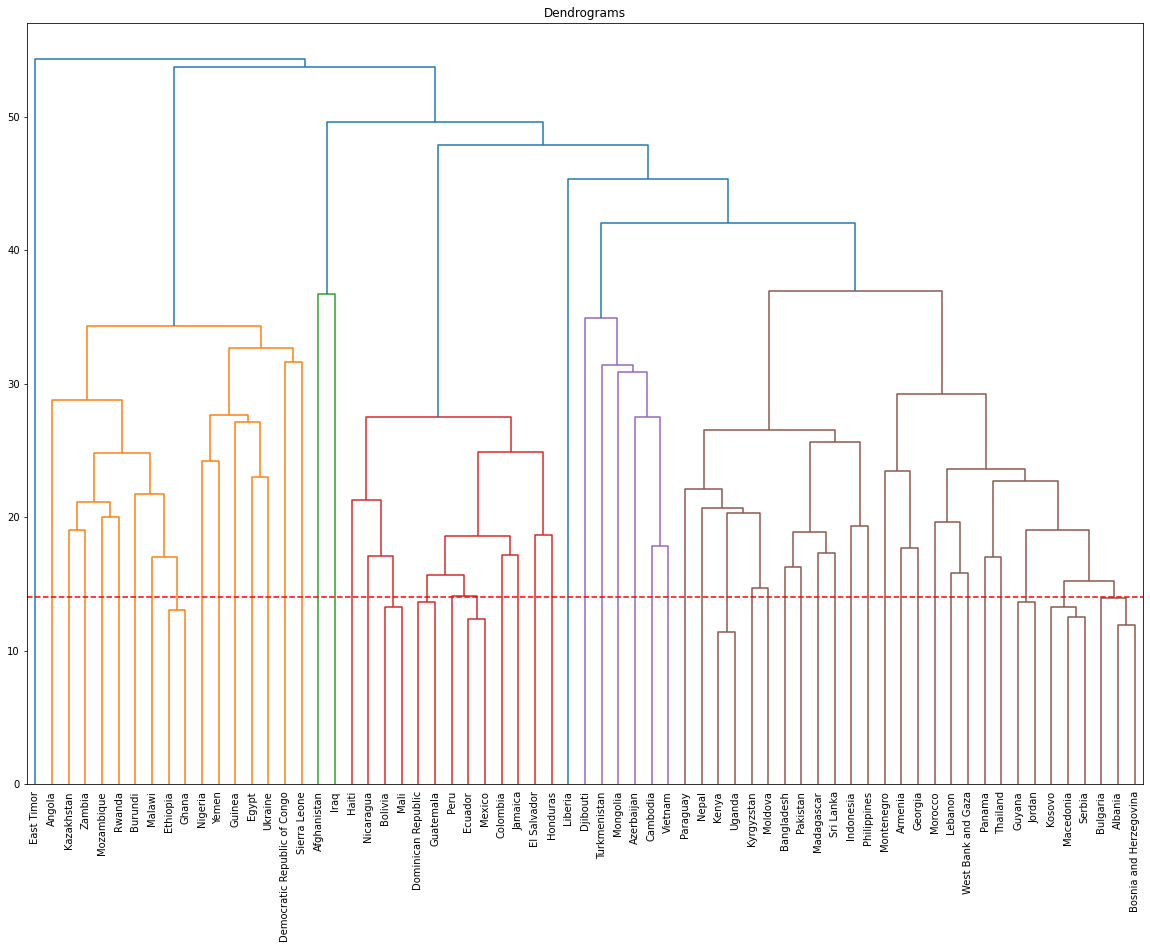

In [35]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10)
plt.axhline(y=14, color='r', linestyle='--')


Summarizing:

- horizontal lines are cluster merges
- vertical lines tell you which clusters/labels were part of merge forming that new cluster
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

In [20]:
linked

array([[ 32.        ,  61.        ,  11.4123485 ,   2.        ],
       [  1.        ,   7.        ,  11.944122  ,   2.        ],
       [ 16.        ,  41.        ,  12.37225952,   2.        ],
       [ 37.        ,  56.        ,  12.55316056,   2.        ],
       [ 19.        ,  21.        ,  13.02610752,   2.        ],
       [  6.        ,  40.        ,  13.24819675,   2.        ],
       [ 33.        ,  70.        ,  13.25395596,   3.        ],
       [ 14.        ,  22.        ,  13.61358822,   2.        ],
       [ 24.        ,  30.        ,  13.62851305,   2.        ],
       [  8.        ,  68.        ,  13.9562756 ,   3.        ],
       [ 53.        ,  69.        ,  14.05368387,   3.        ],
       [ 34.        ,  42.        ,  14.66564388,   2.        ],
       [ 73.        ,  76.        ,  15.18343207,   6.        ],
       [ 74.        ,  77.        ,  15.69138855,   5.        ],
       [ 35.        ,  64.        ,  15.79613558,   2.        ],
       [  5.        ,  50

In [21]:
## 66 Merges in tota = n - 1

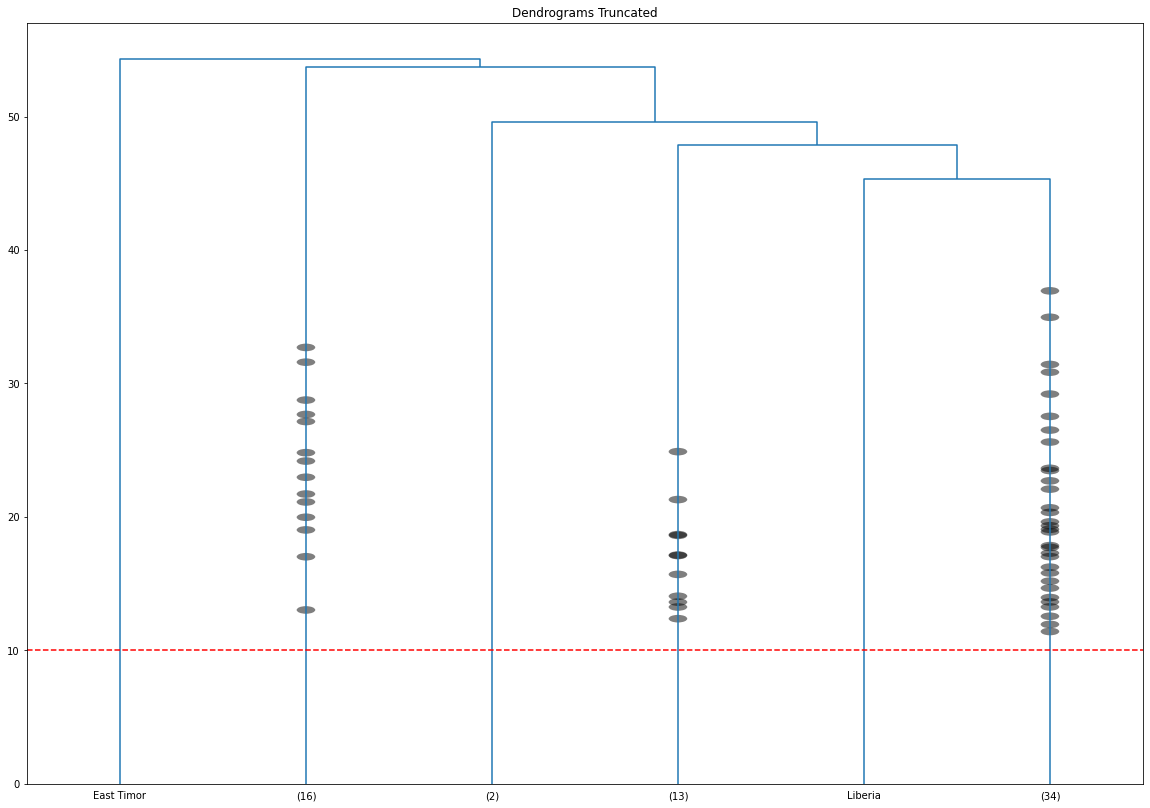

In [22]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms Truncated")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10,truncate_mode='lastp',p=6,show_contracted=True)
plt.axhline(y=10, color='r', linestyle='--')

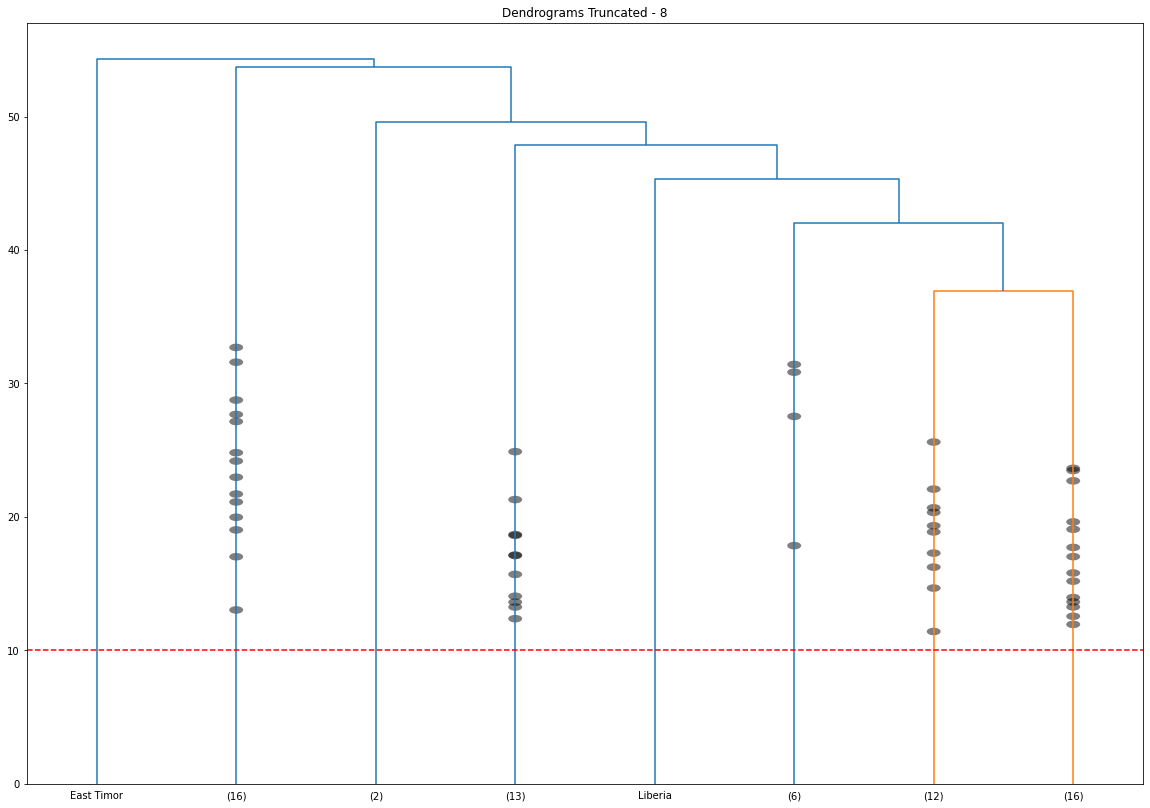

In [23]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms Truncated - 8")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10,truncate_mode='lastp',p=8,show_contracted=True)
plt.axhline(y=10, color='r', linestyle='--')

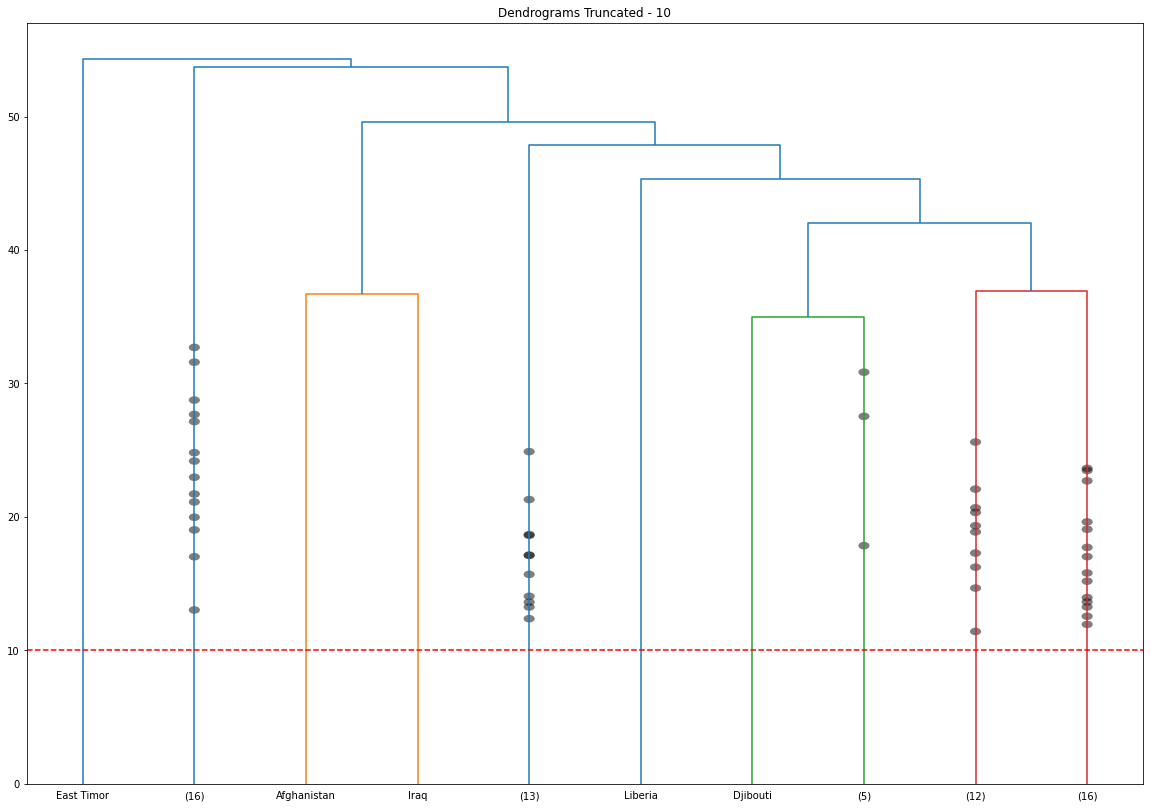

In [24]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms Truncated - 10")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10,truncate_mode='lastp',p=10,show_contracted=True)
plt.axhline(y=10, color='r', linestyle='--')

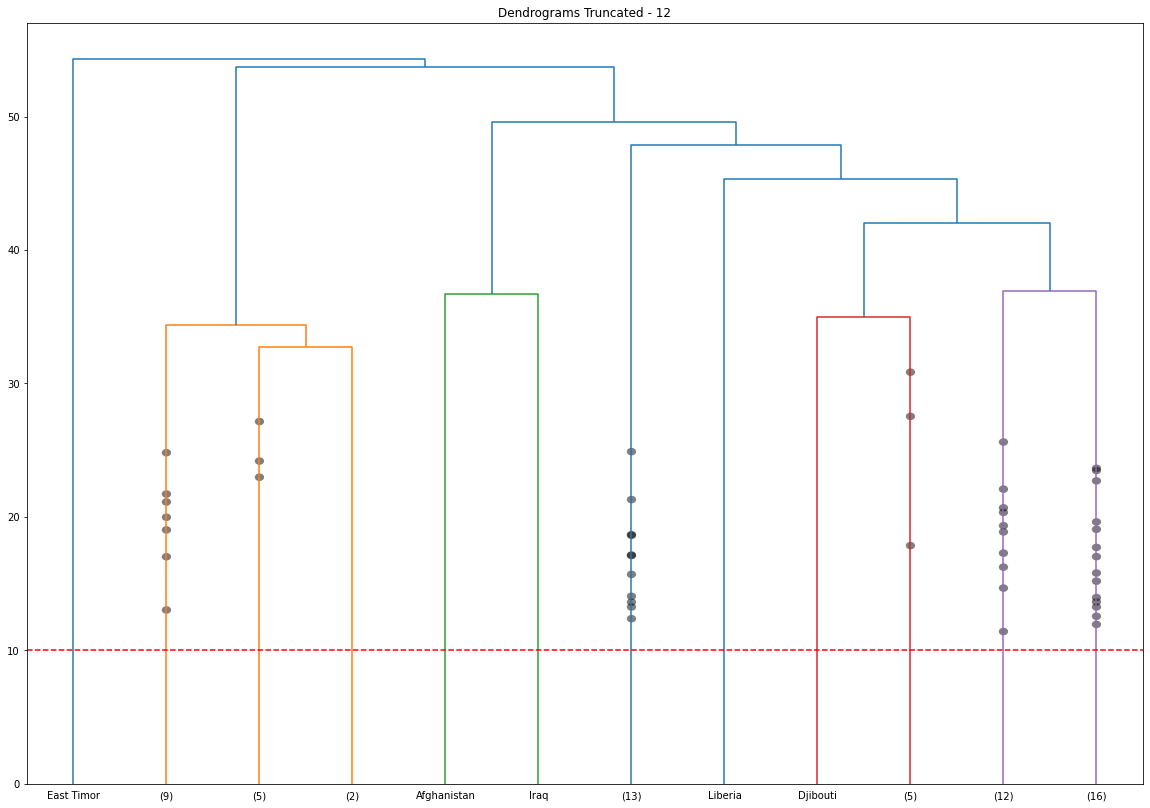

In [25]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms Truncated - 12")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10,truncate_mode='lastp',p=12,show_contracted=True)
plt.axhline(y=10, color='r', linestyle='--')

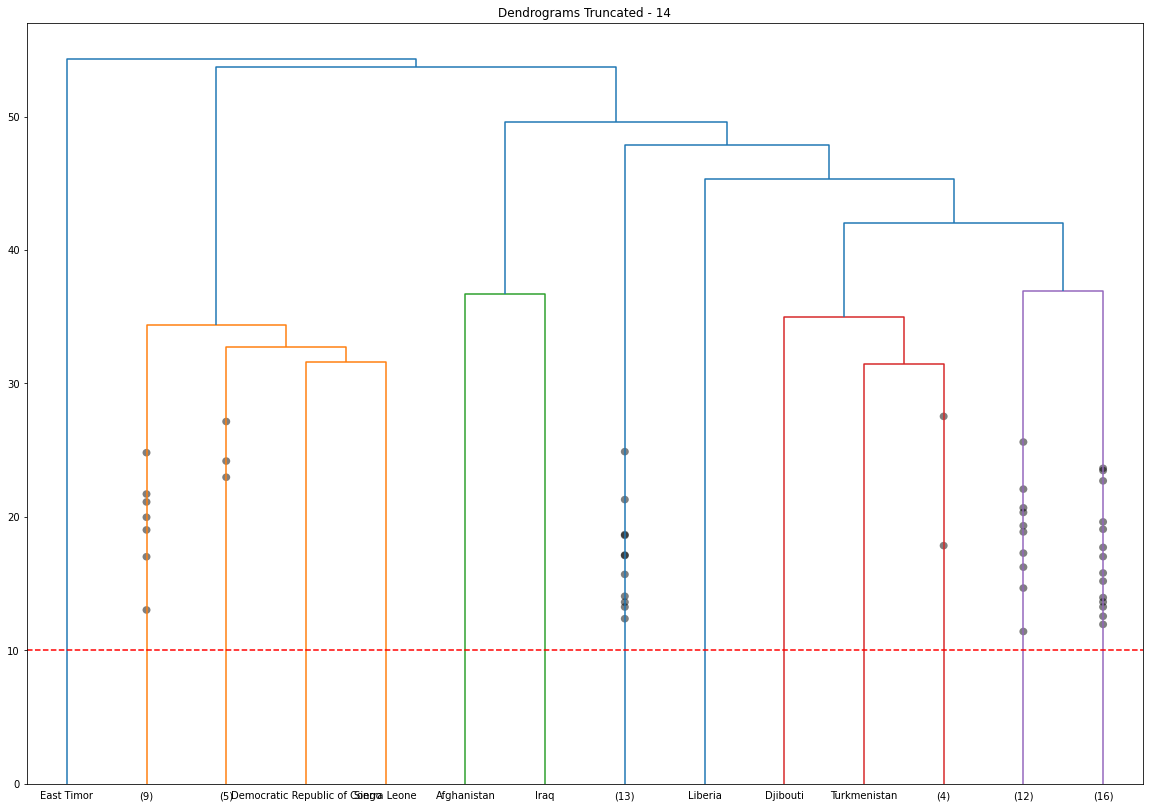

In [26]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms Truncated - 14")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10,truncate_mode='lastp',p=14,show_contracted=True)
plt.axhline(y=10, color='r', linestyle='--')

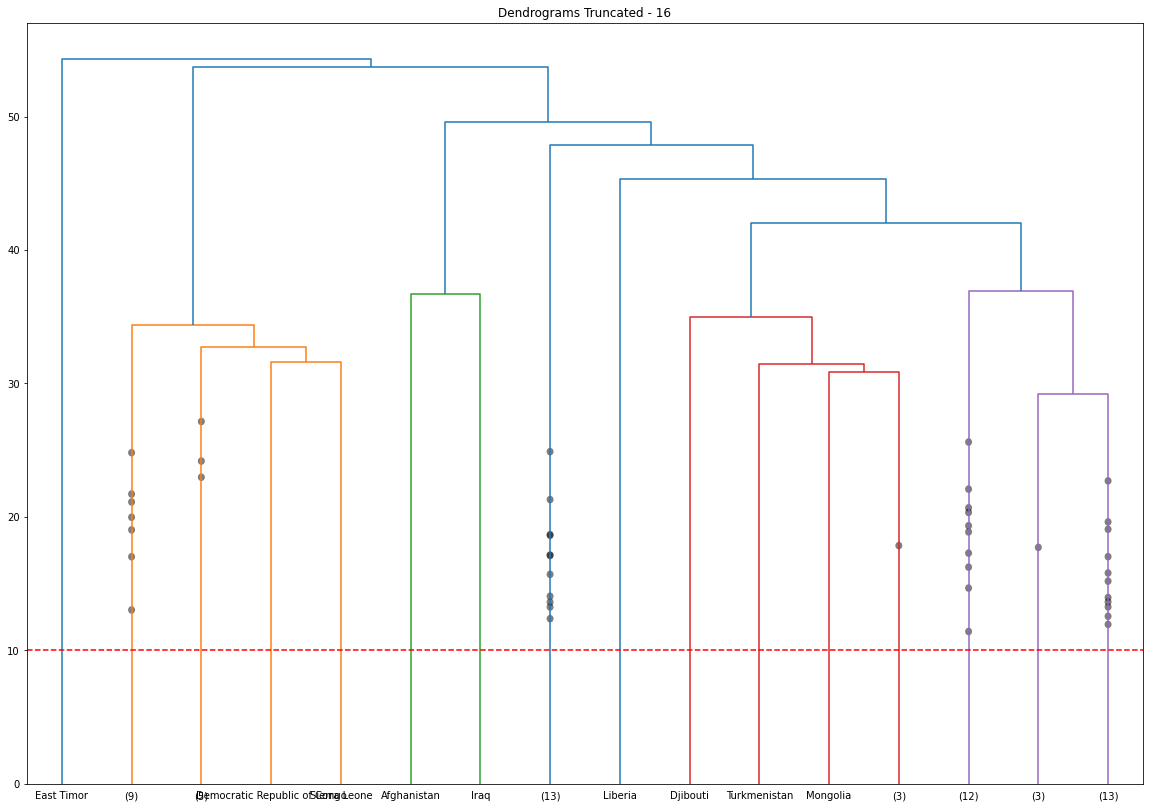

In [27]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms Truncated - 16")  
linked = shc.linkage(scaled_features, method='ward')
dend = shc.dendrogram(linked,labels=labelList,leaf_font_size=10,truncate_mode='lastp',p=16,show_contracted=True)
plt.axhline(y=10, color='r', linestyle='--')

In [28]:
## ANNOTATING THE DISTANCES IN THE DENDOGRAM
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

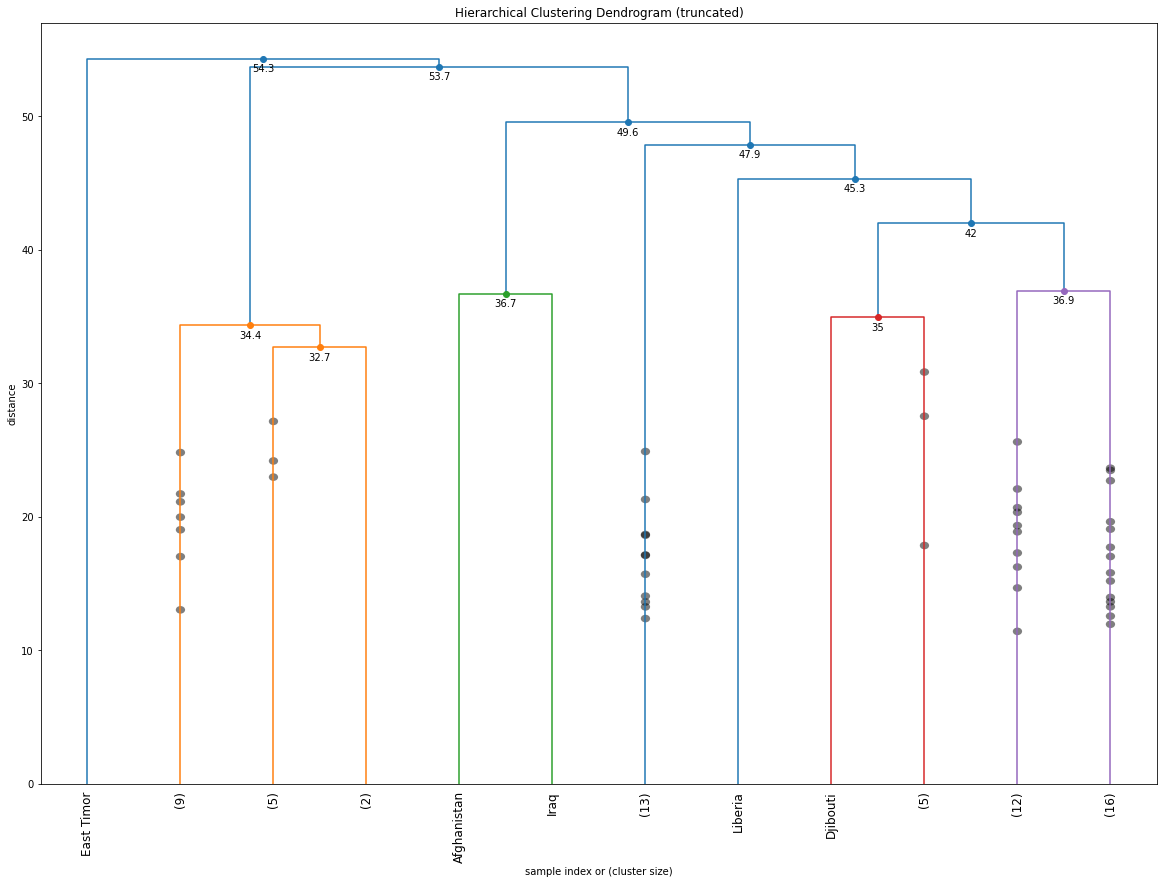

In [29]:
plt.figure(figsize=(20, 14))  

fancy_dendrogram(
    linked,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    labels=labelList)
plt.show()

In [30]:
## typically interested in a huge jump.

In [31]:
## CHOOSING THE RIGHT METHOD TO CUT THE LINE 

#INCONSISTENCY METHOD

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html

In [32]:
from scipy.cluster.hierarchy import inconsistent

depth = 3
incons = inconsistent(linked, depth)
incons[-10:]

array([[29.97987449,  3.53940145,  6.        ,  1.2349261 ],
       [32.4069882 ,  2.22738001,  3.        ,  1.14495698],
       [36.71436285,  0.        ,  1.        ,  0.        ],
       [26.77780295,  5.05539453,  7.        ,  2.0095475 ],
       [33.50587439,  5.62479895,  6.        ,  1.51287577],
       [39.81063887,  4.73185934,  4.        ,  1.16705061],
       [34.81138486, 11.56001817,  6.        ,  1.12953498],
       [41.3925587 ,  9.22404765,  5.        ,  0.88764987],
       [40.52562413,  9.68120747,  7.        ,  1.36224811],
       [47.98849478,  9.33185651,  4.        ,  0.67731394]])

In [33]:
depth = 5
incons = inconsistent(linked, depth)
incons[-10:]

array([[25.21558001,  5.34085934, 14.        ,  1.71043518],
       [28.51975078,  6.52210771,  5.        ,  0.98702628],
       [36.71436285,  0.        ,  1.        ,  0.        ],
       [21.6903451 ,  5.18821715, 19.        ,  2.93868064],
       [26.28556864,  6.8243254 , 18.        ,  2.30497915],
       [31.00116999,  7.51221336, 12.        ,  1.90779835],
       [27.55061006, 10.80388992, 17.        ,  1.88063928],
       [32.41914022, 11.7486908 , 13.        ,  1.46068558],
       [32.78497048, 10.28138253, 19.        ,  2.03560758],
       [38.06653557, 10.64308918, 13.        ,  1.5261129 ]])